# Import libraries

In [1]:
import numpy as np
import random

# Initialize necessary function

In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    # pop = np.random.randint(2, size=(num_individuals, num_variables))
    halfnum_individuals = num_individuals/2
    pop = []
    for i in range(num_variables):
        row = [1 if x < halfnum_individuals else 0 for x in range(num_individuals)]
        np.random.shuffle(row)
        pop.append(row)
    return np.transpose(pop)
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [4]:
def trap(ind, num_variables, k = 5):
  """
  Hàm trap k.

  Arguments:
  ind -- cá thể cần đo độ phù hợp
  num_variables -- chiều dài cá thể chia hết cho k
  k -- kích thước một tổ hợp trap trong cá thể

  Returns:
  value -- giá trị phù hợp của cá thể
  """
  value = 0
  for i in range(0, num_variables, k):
    value += (np.sum(ind[i:i+k]) if np.sum(ind[i:i+k]) == k else k - 1 - np.sum(ind[i:i+k]))
  return value

In [5]:
def tournament_selection(pop, pop_fitness):
    """
    Hàm chọn lọc kiểu tournament.

    Arguments:
    pop -- quần thể
    pop_fitness -- độ phù hợp của các cá thể trong quần thể

    Returns:
    selected_indices -- index của các cá thể được chọn trong pop
    """
    indies = np.arange(len(pop_fitness))
    selected_indices = []
    size = len(pop_fitness)
    #round 1
    for i in range (0, size, 4):
      selected_indices.append(max(indies[i:i+4], key=lambda x: pop_fitness[x]))
    
    #round 2
    np.random.shuffle(indies)
    for i in range (0, size, 4):
      selected_indices.append(max(indies[i:i+4], key=lambda x: pop_fitness[x]))
    
    selected_indices = np.array(selected_indices)
    return selected_indices

In [6]:
def UX_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [7]:
def OneX_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        r = np.random.randint(num_parameters)
        temp = offspring2[r:] 
        offspring2[r:] = offspring1[r:]
        offspring1[r:] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [8]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0
    
    return pop

In [9]:
def check_convergence(pop, num_individuals):
    """
    Hàm kiểm tra sự hội tụ của quần thể

    Arguments:
    pop -- quần thể
    pop_fitness -- độ phù hợp của các cá thể trong quần thể
    num_individuals -- số cá thể của quần thể

    Returns:
    Quần thể có hội tụ chưa
    """

    pop = np.transpose(pop)
    pop_truth = all([np.sum(ind) in [0, num_individuals] for ind in pop])
    return pop_truth

# POPOP implementation

In [10]:
def POPOP(num_individuals, num_parameters, func, crossover_type = "UX"):
    """
    Thuật toán di truyền theo phương pháp POPOP

    Arguments:
    num_individuals -- số cá thể của quần thể
    num_parameters -- số biến của cá thể
    crossover_type -- dạng lai ghép

    Returns:
    pop -- quần thể sau tiến hóa
    pop_fitness -- độ phù hợp của quần thể sau tiến hóa
    num_evaluation -- số lần gọi hàm đánh giá
    """

    pop = initialize_population(num_individuals, num_parameters)
    if(func=="OneMax"):
      pop_fitness = np.array([onemax(ind) for ind in pop])
    elif(func=="Trap"):
      pop_fitness = np.array([trap(ind, num_parameters) for ind in pop])
    num_evaluation = num_individuals
    # selection_size = num_individuals // 2
    # print(num_individuals)
    while(not check_convergence(pop, num_individuals)):
        
        if(crossover_type == "UX"):
          offspring = UX_crossover(pop)
        elif (crossover_type == "1X"):
          offspring = OneX_crossover(pop)
        # offspring = mutation(offspring, 0)
        if(func=="OneMax"):
          offspring_fitness = np.array([onemax(ind) for ind in offspring])
        elif(func=="Trap"):
          offspring_fitness = np.array([trap(ind, num_parameters) for ind in offspring])

        num_evaluation += num_individuals

        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        selected_indices = tournament_selection(pop, pop_fitness)
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        pop = selection_set
        pop_fitness = selection_fitness


    return(pop, pop_fitness, num_evaluation)

# Upper bound of MRPS function

In [11]:
def is_success(num_individuals, num_parameters, seed, func, crossover_type, efforts = 10):
  evaluation = 0
  for i in range(efforts):
      np.random.seed(seed + i)
      pop, pop_fitness, num_evaluation = POPOP(num_individuals, num_parameters, func, crossover_type)
      evaluation += num_evaluation
      if(pop_fitness[0] != num_parameters): 
          return (False, evaluation/(i+1))
          
  return (True, evaluation/efforts)

In [12]:
def find_upper_bound(num_parameters, num_individuals, seed, func, crossover_type = "UX", efforts = 10):
    success = False
    upper_bound = num_individuals
    while(not success):
      if(upper_bound > 8192): return (None, None)
      success, evaluation = is_success(upper_bound, num_parameters, seed, func, crossover_type)
      if(not success): 
          upper_bound *=2 
          # print("Upper bound", upper_bound)
    
    return (upper_bound, evaluation)

# Finding MRPS function

In [13]:
def find_mrps(upper_bound, upper_evaluation, num_parameters, seed, func, crossover_type = "UX", efforts = 10):
    evaluation = upper_evaluation
    lower_bound = upper_bound/2
    while( (upper_bound - lower_bound)/upper_bound > 0.1 ):
      num_individuals = (upper_bound + lower_bound)/2
      test_evaluation = 0

      success, test_evaluation = is_success(upper_bound, num_parameters, seed, func, crossover_type)

      if(success):
        evaluation = test_evaluation
        upper_bound = num_individuals
        # print("Upper bound:", upper_bound)
        # print("Evaluation:", evaluation)
      else:
        lower_bound = num_individuals
      
      if(upper_bound - lower_bound <= 2): 
        break
      return (upper_bound, evaluation)

# Bisection implemetation

In [14]:
problem_size = 10
num_individuals = 4
mssv = 20520835
crossover_type = "UX"
func = "OneMax"
bisection = 10
mrpses = []
evaluations = []
over_max = False
# a_mrpses = []
# b_mrpses = []

for i in range(bisection):
  seed = mssv + i*10
  # print(seed)
  upper_bound, upper_evalutation = find_upper_bound(problem_size, num_individuals, seed, func, crossover_type)
  # print(upper_bound, upper_evalutation)
  if(upper_bound == None): 
    over_max = True
    break
  mrps, evaluation = find_mrps(upper_bound, upper_evalutation, problem_size, seed, func, crossover_type)
  print(mrps," ", evaluation, ",", sep="")
  mrpses.append(mrps)
  evaluations.append(evaluation)

if(not over_max):
  mean_mrps = np.mean(mrpses)
  std_mrps = np.std(mrpses, ddof=1)
  mean_eva = np.mean(evaluations)
  std_eva = np.std(evaluations, ddof=1)

  print(round(mean_mrps, 2), " (", + round(std_mrps, 2), ")", sep="")
  print(round(mean_eva, 2), " (", round(std_eva, 2), ")", sep="")
else: print(None)

24.0 217.6,
24.0 227.2,
12.0 115.2,
24.0 220.8,
12.0 108.8,
24.0 227.2,
12.0 113.6,
12.0 113.6,
12.0 107.2,
24.0 214.4,
18.0 (6.32)
166.56 (58.02)


# Check for statistical significance

In [15]:
import os  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats

1. OneMax

* Calculate std

In [16]:
pop_size = pd.read_excel("BaoCaoLab2_CS410.xlsx", sheet_name="OneMax", index_col=0, skiprows=1, nrows=10)
evaluations_size = pd.read_excel("BaoCaoLab2_CS410.xlsx", sheet_name="OneMax", index_col=0, skiprows=15, nrows=10)
print(pop_size)
print(evaluations_size)

size_OneX = pd.DataFrame({"Random seed": pop_size.index, 
                           10: pop_size[10], 
                           20: pop_size[20], 
                           40: pop_size[40], 
                           80: pop_size[80], 
                           160: pop_size[160]}).set_index("Random seed")
size_UX = pd.DataFrame({"Random seed": pop_size.index, 
                           10: pop_size["10.1"], 
                           20: pop_size["20.1"], 
                           40: pop_size["40.1"], 
                           80: pop_size["80.1"], 
                           160: pop_size["160.1"]}).set_index("Random seed")

eva_OneX = pd.DataFrame({"Random seed": evaluations_size.index, 
                           10: evaluations_size[10], 
                           20: evaluations_size[20], 
                           40: evaluations_size[40], 
                           80: evaluations_size[80], 
                           160: evaluations_size[160]}).set_index("Random seed")
eva_UX = pd.DataFrame({"Random seed": evaluations_size.index, 
                           10: evaluations_size["10.1"], 
                           20: evaluations_size["20.1"], 
                           40: evaluations_size["40.1"], 
                           80: evaluations_size["80.1"], 
                           160: evaluations_size["160.1"]}).set_index("Random seed")

print("\nOneMax-1X_Size", size_OneX.std(), sep="\n")
print("\nOneMax-UX_Size", size_UX.std(), sep="\n")
print("\nnOneMax-1X_Eva", eva_OneX.std(), sep="\n")
print("\nnOneMax-UX_Eva", eva_UX.std(), sep="\n")


             10  20   40   80   160  10.1  20.1  40.1  80.1  160.1
Random seed                                                       
20520835     24  48  192  384  3072    24    24    96    96    192
20520845     24  48  192  768  3072    24    24    48    96    192
20520855     24  48  192  768  3072    12    24    48    96     96
20520865     24  96  384  768  3072    24    24    48    96    192
20520875     24  96  192  768  3072    12    48    48    96     96
20520885     24  48  384  384  3072    24    24    48    96    192
20520895     24  96  192  768  1536    12    24    48    96    192
20520905     24  48  192  384  3072    12    48    48    48    192
20520915     24  96  192  768  3072    12    24    48    48    192
20520925     24  96  192  768  3072    24    24    48    96    192
                10      20      40       80       160   10.1   20.1    40.1  \
Random seed                                                                   
20520835     243.2   748.8  4582.4  14

* Ttest for checking statistical significance

In [17]:
problem_size = [10, 20, 40, 80, 160]
alpha = 0.05
for i in problem_size:
  # print(stats.ttest_ind(size_OneX[i], size_UX[i]))
  print("Problem size: ", i)
  print("-pop_size:", stats.ttest_ind(size_OneX[i], size_UX[i]).pvalue < alpha)
  print("-evaluation:", stats.ttest_ind(eva_OneX[i], eva_UX[i]).pvalue < alpha)

Problem size:  10
-pop_size: True
-evaluation: True
Problem size:  20
-pop_size: True
-evaluation: True
Problem size:  40
-pop_size: True
-evaluation: True
Problem size:  80
-pop_size: True
-evaluation: True
Problem size:  160
-pop_size: True
-evaluation: True


* Visualize MRPS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


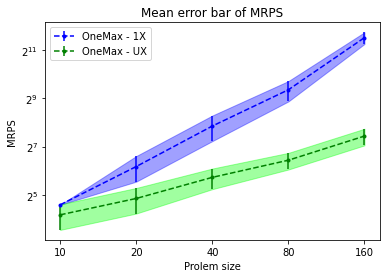

In [18]:
plt.yscale("log", basey = 2)
plt.xscale("log", basex = 2)

x = np.array(size_OneX.mean().index, dtype=float)
y = size_OneX.mean().values
error = size_OneX.std().values
plt.xticks(x)
# print(x,y,error)
plt.errorbar(x,y,error, fmt="b.--", label = "OneMax - 1X")
plt.fill_between(x, y + error, y - error, color="#0000FF5F")

x = np.array(size_UX.mean().index, dtype=float)
y = size_UX.mean().values
error = size_UX.std().values
# print(x,y,error)
plt.errorbar(x,y,error, fmt="g.--", label = "OneMax - UX")
plt.fill_between(x, y + error, y - error, color="#00FF005F")



plt.xlabel("Prolem size")
plt.ylabel("MRPS")
plt.title("Mean error bar of MRPS")
plt.legend(loc = "upper left")
plt.subplot().xaxis.set_major_formatter(mticker.ScalarFormatter())


* Visualize evalations

[ 10.  20.  40.  80. 160.] [ 166.56  384.   1000.96 2312.96 6522.88] [  58.02044084  131.77543187  269.32773592  504.33552148 1428.04256146]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


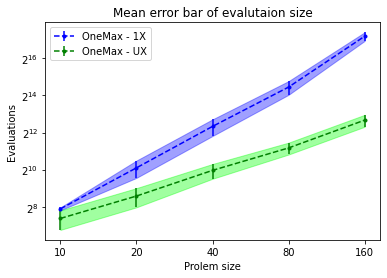

In [19]:
plt.yscale("log", basey = 2)
plt.xscale("log", basex = 2)

x = np.array(eva_OneX.mean().index, dtype=float)
y = eva_OneX.mean().values
error = eva_OneX.std().values
# print(x,y,error)
plt.errorbar(x,y,error, fmt="b.--", label = "OneMax - 1X")
plt.fill_between(x, y + error, y - error, color="#0000FF5F")

x = np.array(eva_UX.mean().index, dtype=float)
y = eva_UX.mean().values
error = eva_UX.std().values
print(x,y,error)
plt.errorbar(x,y,error, fmt="g.--", label = "OneMax - UX")
plt.fill_between(x, y + error, y - error, color="#00FF005F")


plt.xticks(x)
plt.xlabel("Prolem size")
plt.ylabel("Evaluations")
plt.title("Mean error bar of evalutaion size")
plt.legend(loc = "upper left")
plt.subplot().xaxis.set_major_formatter(mticker.ScalarFormatter())


2. Trap-5

* Calculate std

In [20]:
pop_size = pd.read_excel("BaoCaoLab2_CS410.xlsx", sheet_name="Trap-5", index_col=0, skiprows=1, nrows=10)
evaluations_size = pd.read_excel("BaoCaoLab2_CS410.xlsx", sheet_name="Trap-5", index_col=0, skiprows=15, nrows=10)
print(pop_size)
print(evaluations_size)

size_OneX = pd.DataFrame({"Random seed": pop_size.index, 
                           10: pop_size[10], 
                           20: pop_size[20], 
                           40: pop_size[40], 
                           80: pop_size[80], 
                           160: pop_size[160]}).set_index("Random seed")
size_UX = pd.DataFrame({"Random seed": pop_size.index, 
                           10: pop_size["10.1"], 
                           20: pop_size["20.1"], 
                           40: pop_size["40.1"], 
                           80: pop_size["80.1"], 
                           160: pop_size["160.1"]}).set_index("Random seed")

eva_OneX = pd.DataFrame({"Random seed": evaluations_size.index, 
                           10: evaluations_size[10], 
                           20: evaluations_size[20], 
                           40: evaluations_size[40], 
                           80: evaluations_size[80], 
                           160: evaluations_size[160]}).set_index("Random seed")
eva_UX = pd.DataFrame({"Random seed": evaluations_size.index, 
                           10: evaluations_size["10.1"], 
                           20: evaluations_size["20.1"], 
                           40: evaluations_size["40.1"], 
                           80: evaluations_size["80.1"], 
                           160: evaluations_size["160.1"]}).set_index("Random seed")

print("\nTrap-5-1X_Size", size_OneX.std(), sep="\n")
print("\nTrap-5-UX_Size", size_UX.std(), sep="\n")
print("\nnTrap-5-1X_Eva", eva_OneX.std(), sep="\n")
print("\nnTrap-5-UX_Eva", eva_UX.std(), sep="\n")


              10   20    40    80   160  10.1  20.1  40.1  80.1 160.1
Random seed                                                          
20520835      48  192   384  3072  None   192  6144  None  None  None
20520845      96  192   768  3072  None    96  6144  None  None  None
20520855      96  192  1536  3072  None   384  3072  None  None  None
20520865      96  384   768  3072  None   384  6144  None  None  None
20520875      96  192   768  3072  None   192  6144  None  None  None
20520885      96  192   768  6144  None   384  6144  None  None  None
20520895      96  192   768  1536  None   192  3072  None  None  None
20520905     192  384   768  3072  None   192  6144  None  None  None
20520915      96  384   768  1536  None   192  3072  None  None  None
20520925      96  192   768  3072  None   192  3072  None  None  None
                 10      20       40        80   160    10.1      20.1  40.1  \
Random seed                                                                    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is 

* Ttest for checking statistical significance

In [21]:
# problem_size = [10, 20, 40, 80, 160]
problem_size = [10, 20]
alpha = 0.05
for i in problem_size:
  # print(stats.ttest_ind(size_OneX[i], size_UX[i]))
  print("Problem size: ", i)
  print("-pop_size:", stats.ttest_ind(size_OneX[i], size_UX[i]).pvalue < alpha)
  print("-evaluation:", stats.ttest_ind(eva_OneX[i], eva_UX[i]).pvalue < alpha)

Problem size:  10
-pop_size: True
-evaluation: True
Problem size:  20
-pop_size: True
-evaluation: True


* Visualize MRPS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataF

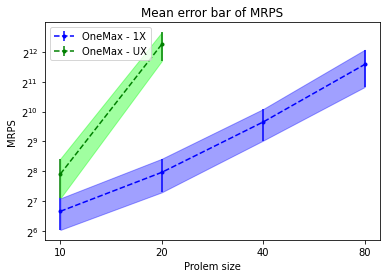

In [22]:
plt.yscale("log", basey = 2)
plt.xscale("log", basex = 2)

x = np.array(size_OneX.mean().index, dtype=float)
y = size_OneX.mean().values
error = size_OneX.std().values
plt.xticks(x)
# print(x,y,error)
plt.errorbar(x,y,error, fmt="b.--", label = "OneMax - 1X")
plt.fill_between(x, y + error, y - error, color="#0000FF5F")

x = np.array(size_UX.mean().index, dtype=float)
y = size_UX.mean().values
error = size_UX.std().values
# print(x,y,error)
plt.errorbar(x,y,error, fmt="g.--", label = "OneMax - UX")
plt.fill_between(x, y + error, y - error, color="#00FF005F")



plt.xlabel("Prolem size")
plt.ylabel("MRPS")
plt.title("Mean error bar of MRPS")
plt.legend(loc = "upper left")
plt.subplot().xaxis.set_major_formatter(mticker.ScalarFormatter())


* Visualize evaluations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataF

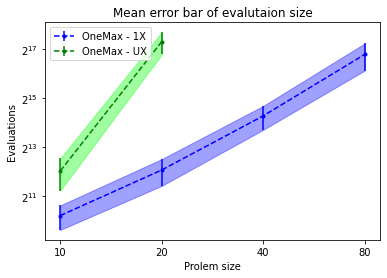

In [23]:
plt.yscale("log", basey = 2)
plt.xscale("log", basex = 2)

x = np.array(eva_OneX.mean().index, dtype=float)
y = eva_OneX.mean().values
error = eva_OneX.std().values
plt.xticks(x)
# print(x,y,error)
plt.errorbar(x,y,error, fmt="b.--", label = "OneMax - 1X")
plt.fill_between(x, y + error, y - error, color="#0000FF5F")

x = np.array(eva_UX.mean().index, dtype=float)
y = eva_UX.mean().values
error = eva_UX.std().values
# print(x,y,error)
plt.errorbar(x,y,error, fmt="g.--", label = "OneMax - UX")
plt.fill_between(x, y + error, y - error, color="#00FF005F")



plt.xlabel("Prolem size")
plt.ylabel("Evaluations")
plt.title("Mean error bar of evalutaion size")
plt.legend(loc = "upper left")
plt.subplot().xaxis.set_major_formatter(mticker.ScalarFormatter())
